# Challenges for week 4

Now that we've seen how to visualise data in Pandas, it's time for you to apply this knowledge. This week has three challenges. Make sure to give it a try and complete all of them. 

**Some important notes for the challenges:**
1. These challenges are a warming up, and help you get ready for class. Make sure to give them a try. If you get an error message, try to troubleshoot it (using Google often helps). If all else fails, go to the next challenge (but make sure to hand it in).
2. While we of course like when you get all the answers right, the important thing is to exercise and apply the knowledge. So we will still accept challenges that may not be complete, as long as we see enough effort *for each challenge*. This means that if one of the challenges is not delivered (not started and no attempt shown), we unfortunately will not be able to provide a full grade for that week.
3. Delivering the challenge on time on Canvas assignment is critical, as it helps also prepare for the DA live session. Check on Canvas how to hand it in.

### Facing issues? 

We are constantly monitoring the issues on the GitHub general repository (https://github.com/uva-cw-digitalanalytics/2021s2/issues) to help you out. Don't hesitate to log an issue there, explaining well what the problem is, showing the code you are using, and the error message you may be receiving. 

**Important:** We are only monitoring the repository in weekdays, from 9.30 to 17.00. Issues logged after this time will most likely be answered the next day. This means you should now wait for our response before submitting a challenge :-)

## Getting setup for the challenges

We will use actual Twitter data for the challenges of this week. To do so, you need:
* To download DMI-TCAT data that you may already be collecting for yourself, or from a colleague (if you haven't requested data collection yet). Please use **the same data** that you requested sentiment analysis for
* The sentiment analysis results (get them from SurfDrive)
* The **retweets** file also available on SurfDrive

If you don't have sentiment analysis results, get them from a colleague (in SurfDrive), but then make sure to download also their Twitter data from DMI-TCAT - otherwise the merge won't work.

The challenges require you to already have two binary variables for the Twitter data based on the ```text``` column (created for DA3). They should be two **meaningful** categories for your data, and they should have either the value 0 (when the tweet is not of that category) or 1 (when the tweet is of that category). 

*You can therefore reuse the code you created for the DA3 challenges, and just continue from there. If you don't have not completed DA3, create them in this assignment*.

**All the challenges below are with this Twitter data. Make sure to start your challenge by doing the basics of loadinhg and inspecting the data, even if not specified in challenge itself.**



## Challenge 1

Create one dataset that merges the information from the retweets file (that contains how many retweets each tweet that was retweeted received), the sentiment analysis, and the Twitter dataset from DMI-TCAT.

*Justify how you have done the merging (in MarkDown), especially for the retweet column. This includes handling missing values, if appropriate.*

In [150]:
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [151]:
pd.options.display.max_colwidth = 10000

In [152]:
complete = pd.read_pickle('complete.pkl')

In [153]:
complete.head()

,id,created_at,source,full_text,retweet_count,favorite_count,followers_count_no_na,friendsCount_no_na,positive,negative,neutral,sent_score,sentiment
0,1438236436084391936,2021-09-15 20:21:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @PBIcanada: We congratulate @GreenpeaceCA on their 50th anniversary today! We recall that one of our founders, George Willoughby, sailed…",7,0,32259.000,27188.000,3,-1,1,2,positive
1,1438236402114772995,2021-09-15 20:20:54+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @cadebe_: @GJGamble @BorisJohnson @trussliz @ChrisGPackham @Greenpeace @seashepherd @Seasaver @CarolineLucas @natalieben I have been fee…,1,0,340.000,1516.000,1,-1,0,0,neutral
2,1438236275283214343,2021-09-15 20:20:23+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>","RT @GreenpeaceCA: I scream, you scream, WE ALL SCREAM TO #TAXTHERICH!\n\nPolls consistently show: Canadians are overwhelmingly in favour of a…",2,0,387.000,672.000,2,-5,-1,-3,negative
3,1438235849058045956,2021-09-15 20:18:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @LongTimeAmy: TODAY IN HISTORY\n\n1971–Environmental group Greenpeace is founded.\n\n2021–Cows can be 'potty trained like children'for green…,16,0,1.000,35.000,2,-1,1,1,positive
4,1438235834415714308,2021-09-15 20:18:38+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @zoev213: Happy 50th @greenpeaceusa Join me and support their important work to protect the environment today! https://t.co/pOKUWxVGZS,2,0,446.000,443.000,3,-1,1,2,positive


In [154]:
len(complete)

420

In [155]:
complete2 = complete.drop_duplicates(subset ="full_text",
                     ignore_index=True)

In [156]:
len(complete2)

263

In [157]:
complete2.loc[complete['id'] == 1438222807821848579]

,id,created_at,source,full_text,retweet_count,favorite_count,followers_count_no_na,friendsCount_no_na,positive,negative,neutral,sent_score,sentiment
132,1438215095553830916,2021-09-15 18:56:14+00:00,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>","RT @oscar_soria: Once a Greenpeacer, always a Greenpeacer! Today the organization that taught me almost everything about activism, civil di…",3,0,0.000,0.000,2,-1,1,1,positive


In [158]:
complete.dtypes

id                             int64
created_at       datetime64[ns, UTC]
source                        object
full_text                     object
retweet_count                  int64
                        ...         
positive                       int64
negative                       int64
neutral                        int64
sent_score                     int64
sentiment                     object
Length: 13, dtype: object

In [159]:
def categorise_df(row):
    row['special_users'] = 0
    if (row['followers_count_no_na'] > 3000) or (row['friendsCount_no_na'] > 3000):
        row['special_users'] = 1
        
    return row 

In [160]:
complete2 = complete2.apply(categorise_df, axis=1)

In [161]:
complete2['special_users'].value_counts()

0    229
1     34
Name: special_users, dtype: int64

In [162]:
complete2['special_users'].value_counts(normalize=True)

0   0.871
1   0.129
Name: special_users, dtype: float64

In [163]:
def categorise_df(row):
    row['bots'] = 0
    if (row['followers_count_no_na'] < 1) or (row['friendsCount_no_na'] < 1):
        row['bots'] = 1
        
    return row 

In [164]:
complete2 = complete2.apply(categorise_df, axis=1)

In [165]:
complete2['bots'].value_counts()

1    151
0    112
Name: bots, dtype: int64

In [166]:
complete2['bots'].value_counts(normalize=True)

1   0.574
0   0.426
Name: bots, dtype: float64

In [167]:
pd.set_option('display.max_rows', 10)

In [168]:
complete2['followers_count_no_na'].value_counts

<bound method IndexOpsMixin.value_counts of 0     32259.000
1       340.000
2       387.000
3         1.000
4       446.000
         ...   
258       0.000
259       0.000
260       0.000
261       0.000
262       0.000
Name: followers_count_no_na, Length: 263, dtype: float64>

In [169]:
def wordlist_any_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0



In [170]:
complete2["full_text"].str.lower()

0                                                          rt @pbicanada: we congratulate @greenpeaceca on their 50th anniversary today! we recall that one of our founders, george willoughby, sailed…
1                                                          rt @cadebe_: @gjgamble @borisjohnson @trussliz @chrisgpackham @greenpeace @seashepherd @seasaver @carolinelucas @natalieben i have been fee…
2                                                        rt @greenpeaceca: i scream, you scream, we all scream to #taxtherich!\n\npolls consistently show: canadians are overwhelmingly in favour of a…
3                                                      rt @longtimeamy: today in history\n\n1971–environmental group greenpeace is founded.\n\n2021–cows can be 'potty trained like children'for green…
4                                                             rt @zoev213: happy 50th @greenpeaceusa join me and support their important work to protect the environment today! https://t.co/pokuwxvgzs


In [175]:
complete2['anniversary_tag'] = complete2['full_text'].apply(wordlist_any_present, args=(['happy','birthday'],))

In [176]:
complete2['fundraising_tag'] = complete2['full_text'].apply(wordlist_any_present, args=(['fundraising ', 'support'],))

In [177]:
complete2['anniversary_tag'] .value_counts()

0    234
1     29
Name: anniversary_tag, dtype: int64

In [179]:
complete2['anniversary_tag'] .value_counts(normalize=True)

0   0.890
1   0.110
Name: anniversary_tag, dtype: float64

In [178]:
complete2['fundraising_tag'].value_counts()

0    250
1     13
Name: fundraising_tag, dtype: int64

In [180]:
complete2['fundraising_tag'].value_counts(normalize=True)

0   0.951
1   0.049
Name: fundraising_tag, dtype: float64

In [181]:
complete2.head()

,id,created_at,source,full_text,retweet_count,favorite_count,followers_count_no_na,friendsCount_no_na,positive,negative,neutral,sent_score,sentiment,special_users,bots,anniversary_tag,fundraising_tag
0,1438236436084391936,2021-09-15 20:21:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @PBIcanada: We congratulate @GreenpeaceCA on their 50th anniversary today! We recall that one of our founders, George Willoughby, sailed…",7,0,32259.000,27188.000,3,-1,1,2,positive,1,0,0,0
1,1438236402114772995,2021-09-15 20:20:54+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @cadebe_: @GJGamble @BorisJohnson @trussliz @ChrisGPackham @Greenpeace @seashepherd @Seasaver @CarolineLucas @natalieben I have been fee…,1,0,340.000,1516.000,1,-1,0,0,neutral,0,0,0,0
2,1438236275283214343,2021-09-15 20:20:23+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>","RT @GreenpeaceCA: I scream, you scream, WE ALL SCREAM TO #TAXTHERICH!\n\nPolls consistently show: Canadians are overwhelmingly in favour of a…",2,0,387.000,672.000,2,-5,-1,-3,negative,0,0,0,0
3,1438235849058045956,2021-09-15 20:18:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @LongTimeAmy: TODAY IN HISTORY\n\n1971–Environmental group Greenpeace is founded.\n\n2021–Cows can be 'potty trained like children'for green…,16,0,1.000,35.000,2,-1,1,1,positive,0,0,0,0
4,1438235834415714308,2021-09-15 20:18:38+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @zoev213: Happy 50th @greenpeaceusa Join me and support their important work to protect the environment today! https://t.co/pOKUWxVGZS,2,0,446.000,443.000,3,-1,1,2,positive,0,0,1,1


In [184]:
def categorise_df(row):
    row['possible_targets'] = 0
    if (row['anniversary_tag'] == 1) or (row['fundraising_tag'] == 1):
        row['possible_targets'] = 1
        
    return row 

In [185]:
complete2 = complete2.apply(categorise_df, axis=1)

In [188]:
complete2['possible_targets'].value_counts()

0    223
1     40
Name: possible_targets, dtype: int64

In [187]:
complete2['possible_targets'].value_counts(normalize=True)

0   0.848
1   0.152
Name: possible_targets, dtype: float64

## Challenge 2

Propose and visualise the answer for a RQ that has the **number of retweets** or **sentiment** as the dependent variable, and one of the categories you created as the independent variable. Justify your choices in the answer.

In this answer, you need to:
* Show descriptive statistics for the IV and the DV
* Create one univariate visualisation for the IV
* Create one univariate visualisation for the DV
* Create one bivariate visualisation with the IV and DV in the same chart
* Show the descriptives of the DV grouped by the IV
* Provide a brief summary (in MarkDown) with your interpretation of the results

In [190]:
complete2.columns

Index(['id', 'created_at', 'source', 'full_text', 'retweet_count',
       'favorite_count', 'followers_count_no_na', 'friendsCount_no_na',
       'positive', 'negative', 'neutral', 'sent_score', 'sentiment',
       'special_users', 'bots', 'anniversary_tag', 'fundraising_tag',
       'possible_targets'],
      dtype='object')

In [203]:
pd.set_option('display.max_rows', 20)

In [229]:
complete2[['sent_score', 'retweet_count']].describe()

,sent_score,retweet_count
count,263.000,263.000
mean,0.019,13.665
std,1.383,54.376
min,-4.000,0.000
25%,-1.000,0.000
50%,0.000,0.000
75%,1.000,4.000
max,3.000,648.000


In [230]:
complete2[['anniversary_tag']].describe()

,anniversary_tag
count,263.000
mean,0.110
std,0.314
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,1.000


In [231]:
complete2[['fundraising_tag']].describe()

,fundraising_tag
count,263.000
mean,0.049
std,0.217
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,1.000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sent_score', ylabel='Density'>

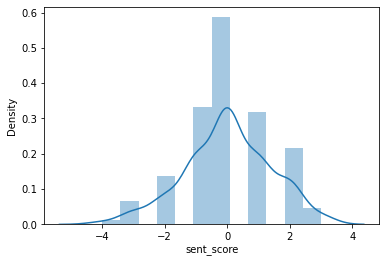

In [212]:
sns.distplot(complete2['sent_score'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retweet_count', ylabel='Density'>

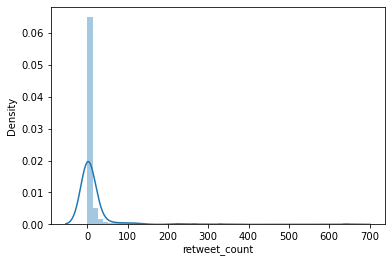

In [215]:
sns.distplot(complete2['retweet_count'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='favorite_count', ylabel='Density'>

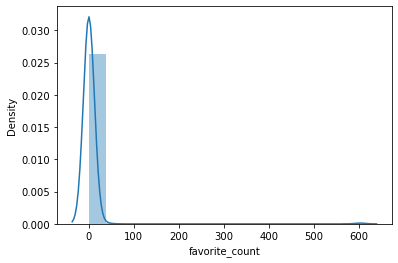

In [216]:
sns.distplot(complete2['favorite_count'])

<AxesSubplot:xlabel='anniversary_tag', ylabel='count'>

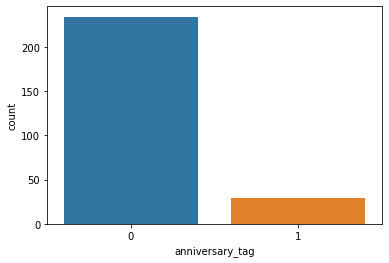

In [233]:
sns.countplot(x='anniversary_tag', data=complete2)

<AxesSubplot:xlabel='fundraising_tag', ylabel='count'>

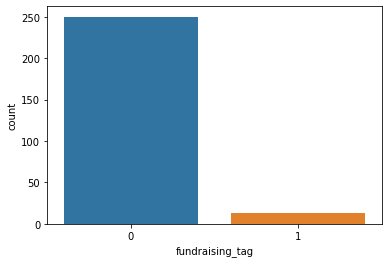

In [234]:
sns.countplot(x='fundraising_tag', data=complete2)

<AxesSubplot:xlabel='fundraising_tag', ylabel='sent_score'>

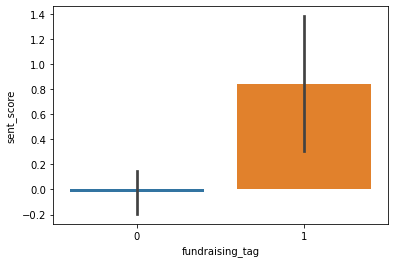

In [221]:
sns.barplot(x='fundraising_tag', y='sent_score', data=complete2)

<AxesSubplot:xlabel='fundraising_tag', ylabel='sent_score'>

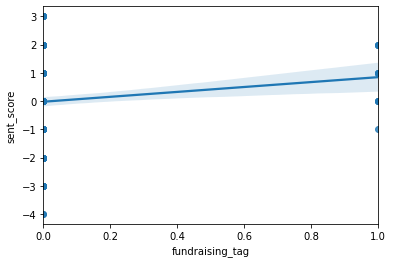

In [226]:
sns.regplot(x='fundraising_tag', y='sent_score', data=complete2)

<AxesSubplot:xlabel='anniversary_tag', ylabel='sent_score'>

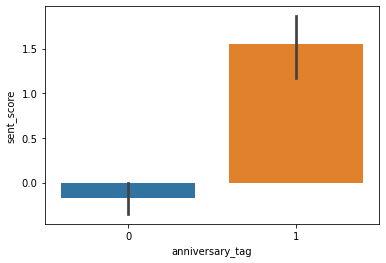

In [222]:
sns.barplot(x='anniversary_tag', y='sent_score', data=complete2)

<AxesSubplot:xlabel='anniversary_tag', ylabel='sent_score'>

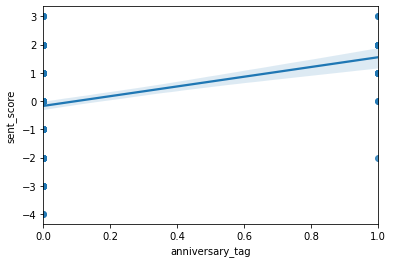

In [225]:
sns.regplot(x='anniversary_tag', y='sent_score', data=complete2)

<AxesSubplot:xlabel='possible_targets', ylabel='sent_score'>

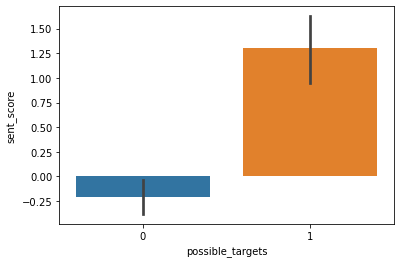

In [223]:
sns.barplot(x='possible_targets', y='sent_score', data=complete2)

<AxesSubplot:xlabel='possible_targets', ylabel='sent_score'>

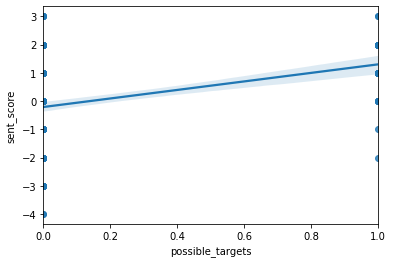

In [224]:
sns.regplot(x='possible_targets', y='sent_score', data=complete2)

In [228]:
complete2.groupby(['sentiment'])['retweet_count','favorite_count'].describe().transpose()

<ipython-input-228-c393f3ffc914>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  complete2.groupby(['sentiment'])['retweet_count','favorite_count'].describe().transpose()


sentiment             negative  neutral  positive
retweet_count  count    84.000   90.000    89.000
               mean      9.131   11.500    20.135
               std      38.310   39.985    75.730
               min       0.000    0.000     0.000
               25%       0.000    0.000     0.000
               50%       0.000    0.000     0.000
               75%       2.250    4.000     5.000
               max     268.000  333.000   648.000
favorite_count count    84.000   90.000    89.000
               mean      0.607    0.767     7.573
               std       2.250    4.251    63.769
               min       0.000    0.000     0.000
               25%       0.000    0.000     0.000
               50%       0.000    0.000     0.000
               75%       1.000    0.000     0.000
               max      20.000   38.000   602.000

In [ ]:
Show the descriptives of the DV grouped by the IV

<AxesSubplot:xlabel='sent_score', ylabel='retweet_count'>

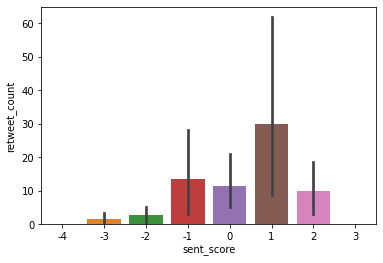

In [219]:
sns.barplot(x='sent_score', y='retweet_count', data=complete2)

In [209]:
complete2.groupby(['possible_targets'])['fundraising_tag','anniversary_tag'].describe().transpose()

<ipython-input-209-cb34e58d57fa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  complete2.groupby(['possible_targets'])['fundraising_tag','anniversary_tag'].describe().transpose()


possible_targets            0      1
fundraising_tag count 223.000 40.000
                mean    0.000  0.325
                std     0.000  0.474
                min     0.000  0.000
                25%     0.000  0.000
                50%     0.000  0.000
                75%     0.000  1.000
                max     0.000  1.000
anniversary_tag count 223.000 40.000
                mean    0.000  0.725
                std     0.000  0.452
                min     0.000  0.000
                25%     0.000  0.000
                50%     0.000  1.000
                75%     0.000  1.000
                max     0.000  1.000